<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

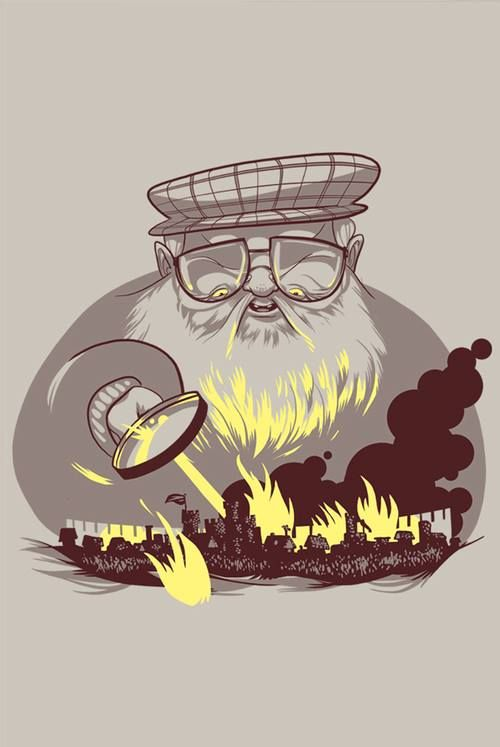

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

Аналитика: https://datauab.github.io/got_death_predictions/

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
train_data = pd.read_csv('/content/game_of_thrones_train.csv', index_col="S.No")

# Загрузите второй файл
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col="S.No")
train_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/game_of_thrones_train.csv'

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Наблюдаем достаточно большое количество пропущенны значений в категориальных колонках:
- 'title' - 53.95 %, 'mother' - 98.84 %, 'father' - 98.59 %,'heir' - 98.65 %, 'spouse' - 87.16 %; такое же процентное соотношение для 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse';
- 'title' - 53.95 %, 'culture' - 68.66 %

количественные:
- 'dateOfBirth' и 'age' - 82.08 %, house - 24.47 %

In [5]:
train_data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [6]:
na_percentage = round((train_data['mother'].isna().sum() / len(train_data['mother'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак mother')

98.84 % пропущенных данных у признакак mother


In [7]:
na_percentage = round((train_data['isAliveMother'].isna().sum() / len(train_data['isAliveMother'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак mother')

98.84 % пропущенных данных у признакак mother


In [8]:
na_percentage = round((train_data['father'].isna().sum() / len(train_data['father'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак father')

98.59 % пропущенных данных у признакак father


In [9]:
na_percentage = round((train_data['heir'].isna().sum() / len(train_data['heir'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак heir')

98.65 % пропущенных данных у признакак heir


In [10]:
na_percentage = round((train_data['spouse'].isna().sum() / len(train_data['spouse'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак spouse')

87.16 % пропущенных данных у признакак spouse


In [11]:
na_percentage = round((train_data['culture'].isna().sum() / len(train_data['culture'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак culture')

68.66 % пропущенных данных у признакак culture


In [12]:
na_percentage = round((train_data['house'].isna().sum() / len(train_data['house'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак house')

24.47 % пропущенных данных у признакак house


<BarContainer object of 25 artists>

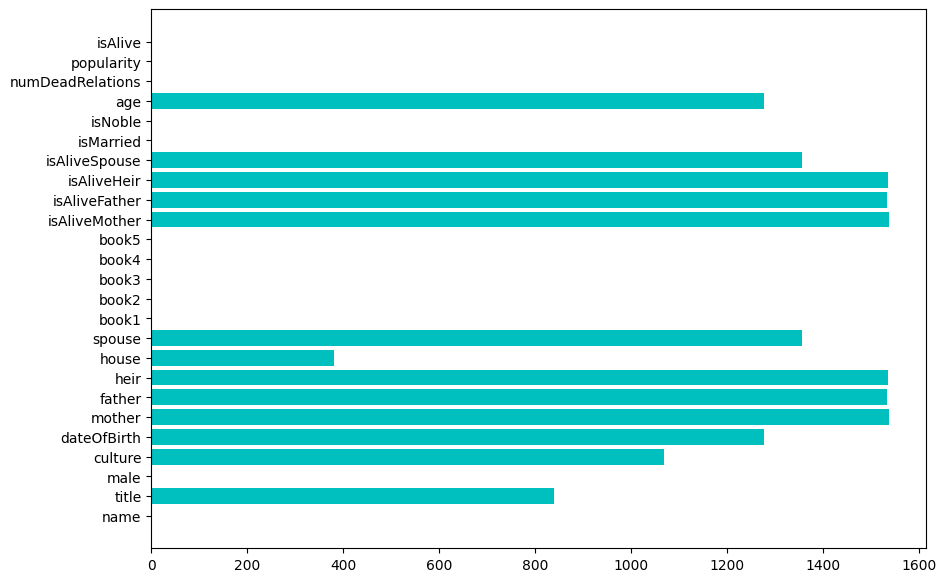

In [13]:
data_views = train_data.isna().sum(axis = 0)
plt.figure(figsize = (10,7))
plt.barh(data_views.index, data_views.values, color = 'c')

In [4]:
mode_house = train_data['house'].mode()
mode_house # Находим наиболее часто встречаемую категорию признака

,house
0,House Frey


In [4]:
# Заменим Nan модой, тк пропусков 25%
train_data.house = train_data.house.fillna(train_data.house.mode()[0])

In [16]:
na_percentage = round((train_data['dateOfBirth'].isna().sum() / len(train_data['dateOfBirth'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак dateOfBirth')

82.08 % пропущенных данных у признакак dateOfBirth


In [5]:
# Заполним нейтральным отличным числом
# train_data.dateOfBirth = train_data.dateOfBirth.fillna(train_data.dateOfBirth.median())
# train_data.age = train_data.age.fillna(train_data.age.median())

In [5]:
train_data.dateOfBirth = train_data.dateOfBirth.fillna(0)
train_data.age = train_data.age.fillna(0)

In [6]:
# Объединв признаки dateOfBirth и ag, создадим категориальну переменную, чтобы
# определить доживших до 305 года
train_data['birth_age_305'] = train_data.apply(
    lambda row: 'Alive' if row['dateOfBirth'] + row['age'] >= 305 else (
    'No' if not pd.isnull(row['dateOfBirth']) else 'Unknown'), axis=1)

In [20]:
na_percentage = round((train_data['title'].isna().sum() / len(train_data['title'])) * 100, 3)
print(f'{na_percentage:.2f} % пропущенных данных у признакак title')

53.95 % пропущенных данных у признакак title


In [6]:
train_data['title'].value_counts().head(10)

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


In [7]:
# Заменим пропущенные значения категорией unknown
train_data['title'] = train_data['title'].fillna("unknown")

In [20]:
train_data['title'].unique()

array(['unknown', 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', '

In [8]:
# объединим титулы в группы покрупнее
# с помощью регулярного выражения создаем тэги по первому слову (до пробела или тире)
train_data['Title'] = train_data.title.str.extract('^([^\s-]+)', expand=False)

In [9]:
train_data['Title'] = train_data['Title'].replace('Ten', 'Lord')
train_data['Title'] = train_data['Title'].replace('PrincessSepta', 'Princess')
train_data['Title'] = train_data['Title'].replace(['LadyQueenDowager', 'PrincessQueen',
                                       'QueenBlack', 'LadyQueen'],'Queen')
train_data['Title'] = train_data['Title'].replace('Lord', 'Lordsport')
train_data['Title'] = train_data['Title'].replace('CastellanCommander', 'Commander')
train_data['Title'] = train_data['Title'].replace(['Archmaester', 'Grand'],'Maester')
train_data['Title'] = train_data['Title'].replace(['Sealord', 'Lordsport'],'Lord')

In [26]:
train_data['Title'].unique()

array(['unknown', 'Lord', 'Ser', 'Queen', 'Greenstone', 'Hand', 'Maester',
       'Khal', 'red', 'Castellan', 'Seven', 'Brother', 'Prince', 'Lady',
       'Princess', 'Septa', 'Septon', 'King', 'Seneschal', 'Bloodrider',
       'Stokeworth', 'Goodman', 'Wisdom', 'Winterfell', 'Steward',
       'Eyrie', 'Casterly', 'Cupbearer', 'Hornwood', 'Blue', 'Red',
       'Khalakka', 'Good', 'Last', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind', 'Broad',
       'Brightwater', 'Blackcrown', 'Golden', 'Whitewalls', 'Hornvale',
       'Claw', 'Ironoaks', 'Bitterbridge', 'Strongsong', 'Goldengrove',
       'Harridan', 'Pinkmaiden', 'Cerwyn', 'Godsgrace', 'Duskendale',
       'Knight', 'Sharp', 'Riverrun', 'Grassy', 'Longbow', 'Hayford',
       'Dyre', 'Skyreach', 'Feastfires', 'Stonehelm', 'Crag', 'Gulltown',
       'Sweetsister', 'Starpike', 'Sweetport', 'High', 'Felwood',
       'Goldgrass', 'Redfort', 'Tower', 'Big', 'First', "Karl's",
       'Blackmont', 

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [10]:
train_data['isPopular'] = train_data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

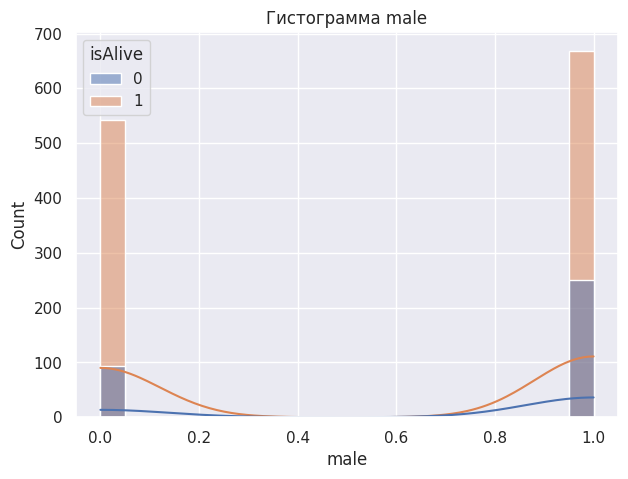

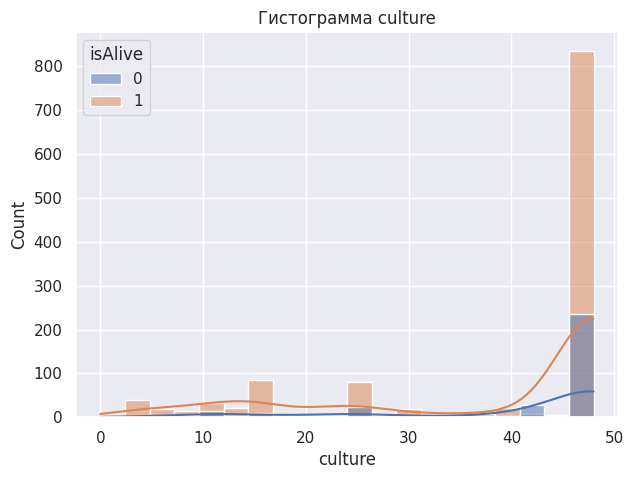

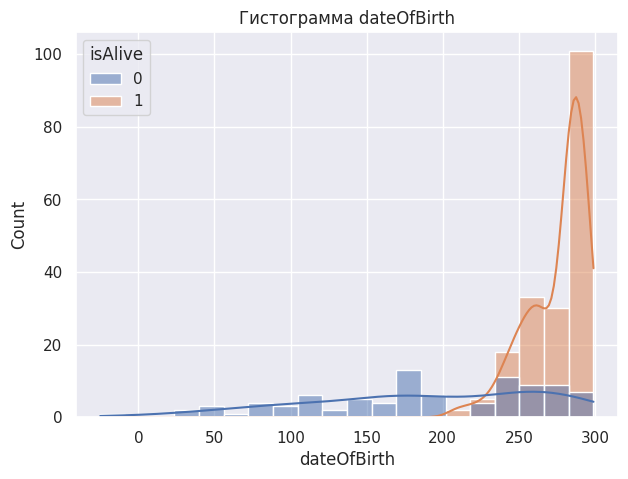

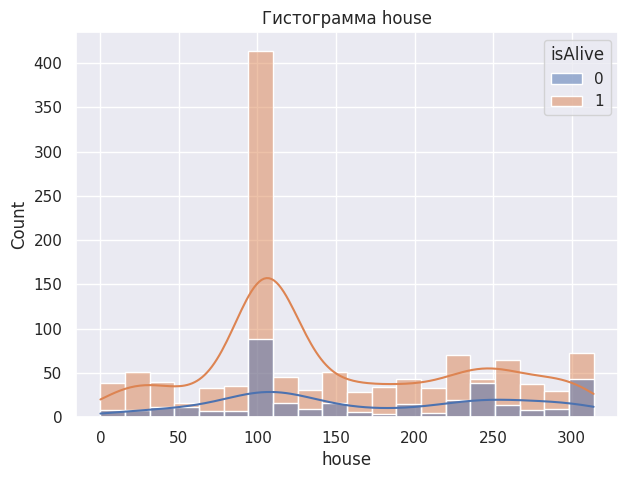

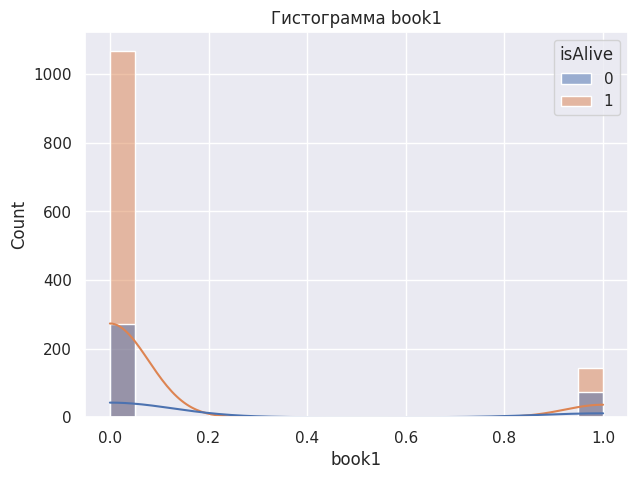

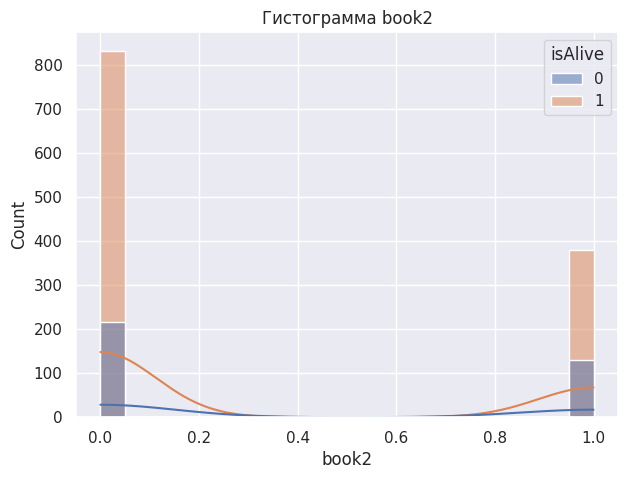

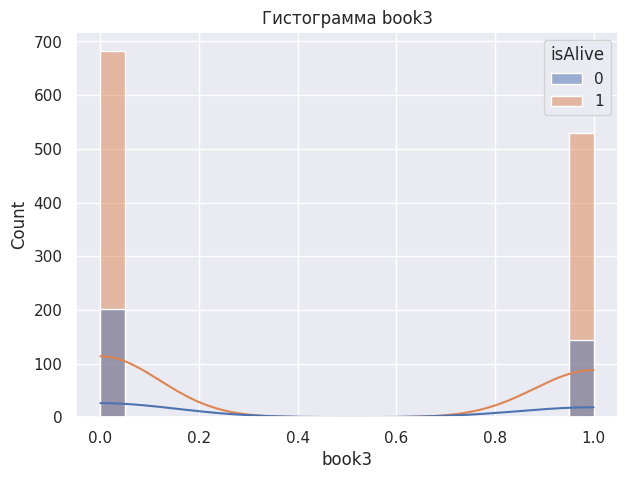

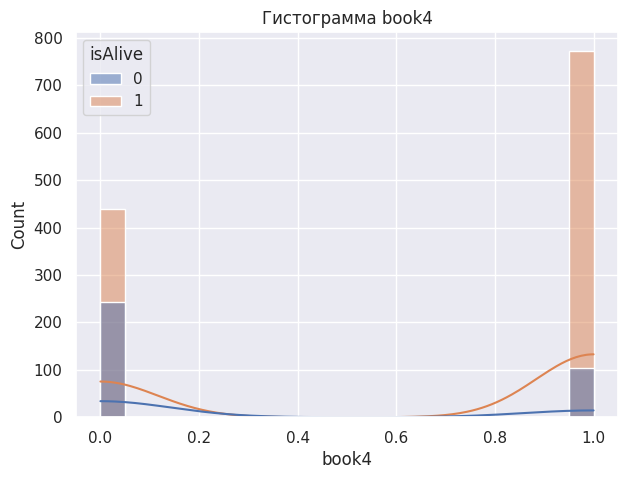

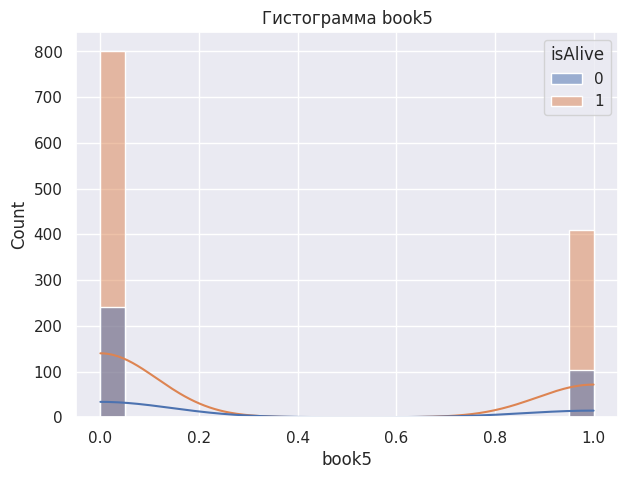

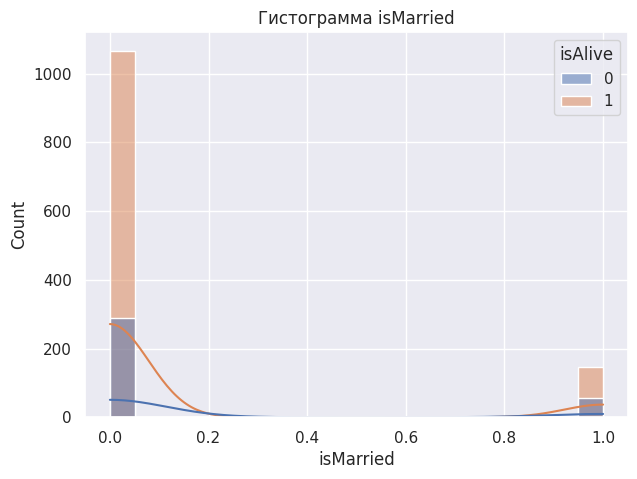

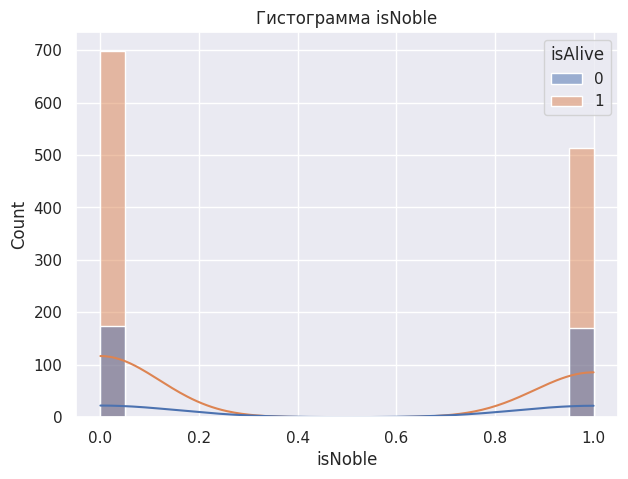

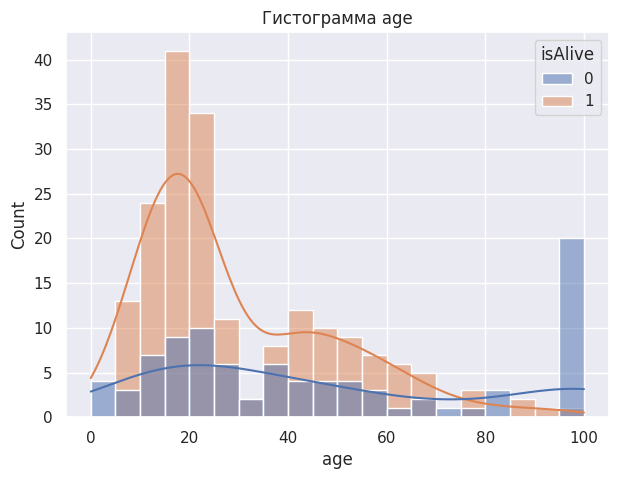

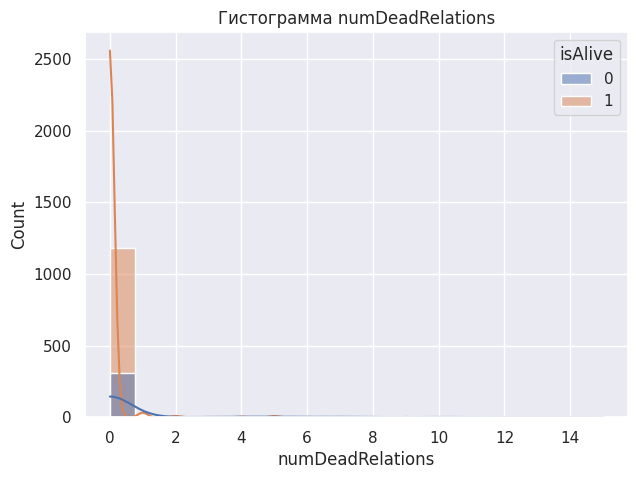

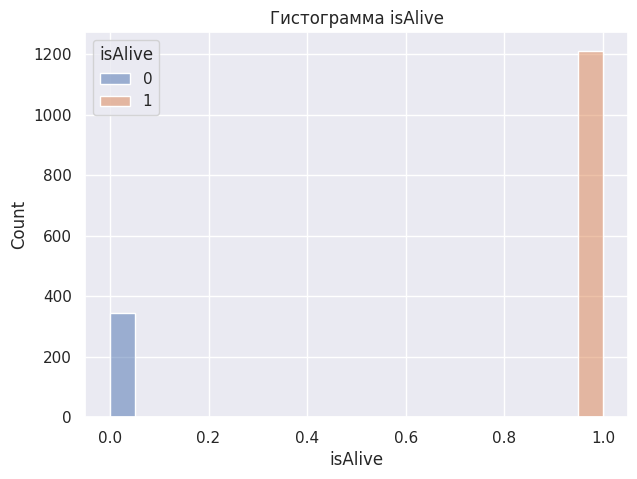

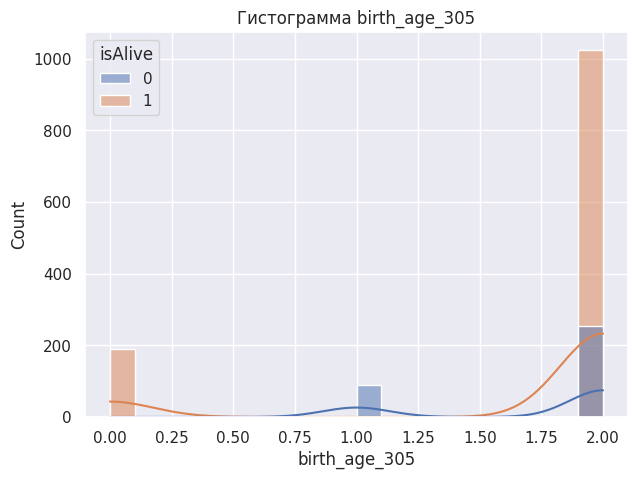

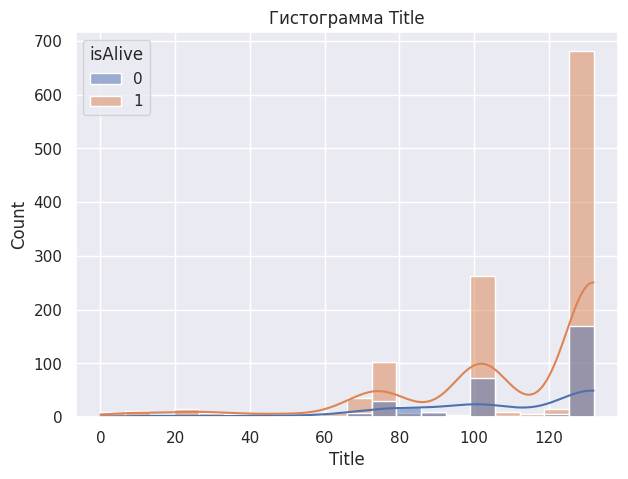

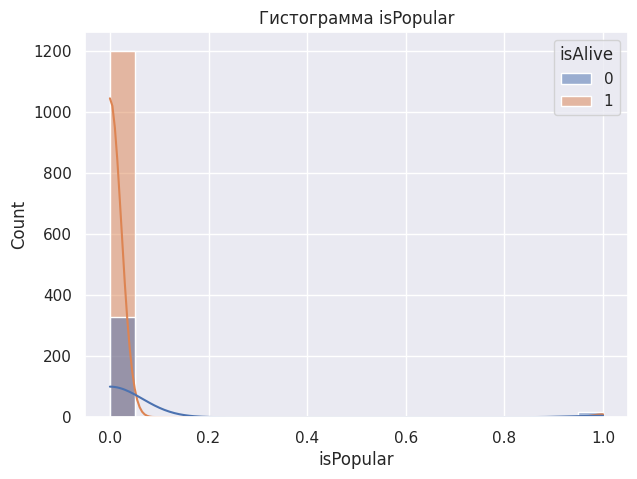

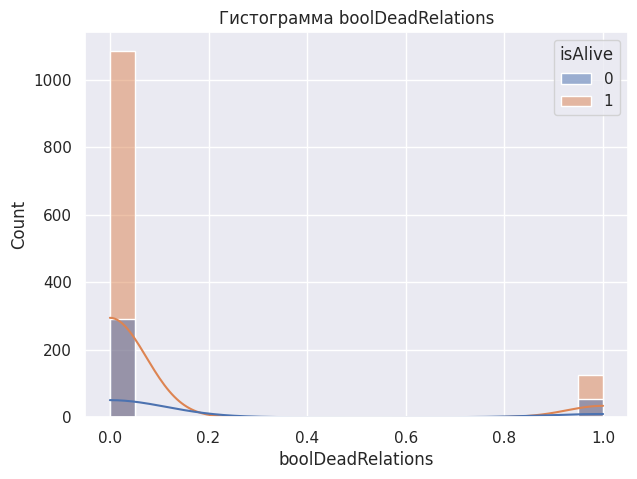

In [24]:
for col in train_data.select_dtypes(include='number'):
    plt.figure(figsize=(7, 5))
    plt.title(f'Гистограмма {col}')
    sns.histplot(x = col, hue = 'isAlive', bins = 20, kde = True, data = train_data)
    plt.show()

Мы наблюдаем что сильное влияние на вероятность смерти персонажа сказываются следующие фактиры:
- среди мужчин этот число в 2 раза выше
- половина персонажей появившихся в первой книге и отсутствующих в 4-ой
- жива мать, отец, наследник, большая доля у кого нет супруга
- кому около 00 лет или в районе 20
- нет внутренних входящих и исходящих ссылок на страницу персонажа

In [11]:
# Создаем новый признак boolDeadRelations
train_data['boolDeadRelations'] = (
    (train_data['isAliveMother'] == 1) |
    (train_data['isAliveFather'] == 1) |
    (train_data['isAliveHeir'] == 1) |
    (train_data['isAliveSpouse'] == 1)
    ).astype(int)

In [12]:
train_data['culture'] = train_data['culture'].replace(['summer islands', 'summer islander',
                                           'summer isles'],'Summer Islands')
train_data['culture'] = train_data['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'],
                                          'Ghiscari')
train_data['culture'] = train_data['culture'].replace(["asshai'i", 'asshai'],'Asshai')
train_data['culture'] = train_data['culture'].replace(['lysene', 'lyseni'],'Lysene')
train_data['culture'] = train_data['culture'].replace(['Sealord', 'Lordsport'],'Andal')
train_data['culture'] = train_data['culture'].replace(['braavosi', 'braavos'],'Braavosi')
train_data['culture'] = train_data['culture'].replace(['dornishmen', 'dorne', 'dornish'],
                                          'Dornish')
train_data['culture'] = train_data['culture'].replace(['myr', 'myrish', 'myrmen'],'Myrish')
train_data['culture'] = train_data['culture'].replace(['westermen', 'westerman',
                                           'westerlands'],'Westermen')
train_data['culture'] = train_data['culture'].replace(['westeros', 'westerosi'],'Westerosi')
train_data['culture'] = train_data['culture'].replace(['stormlands', 'stormlander'],'Stormlander')
train_data['culture'] = train_data['culture'].replace(['norvos', 'norvoshi'],'Norvoshi')
train_data['culture'] = train_data['culture'].replace(['wildling', 'first men',
                                           'free folk'],'Free Folk')
train_data['culture'] = train_data['culture'].replace(['the north', 'northmen'],'Northmen')
train_data['culture'] = train_data['culture'].replace(['qartheen', 'qarth'],'Qartheen')
train_data['culture'] = train_data['culture'].replace(['the reach', 'reach', 'reachmen'],'Reach')

In [32]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [13]:
train_data.culture = train_data.culture.fillna('unknown')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [14]:
train_data.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
'popularity', 'name', 'title'], inplace = True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   dateOfBirth        1557 non-null   float64
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  numDeadRelations   1557 non-null   int64  
 13  isAlive            1557 non-null   int64  
 14  birth_age_305      1557 non-null   object 
 15  Title              1557 non-null   object 
 16  isPopular          1557 non-n

In [15]:
train_data.isna().sum(axis = 0).sum()

0

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [19]:
train_data.isAlive.value_counts()
# наблюдаем явный дисбаланс классов

,count
isAlive,
1,1212
0,345


Целевая переменная является категориальной, задана булевым значением

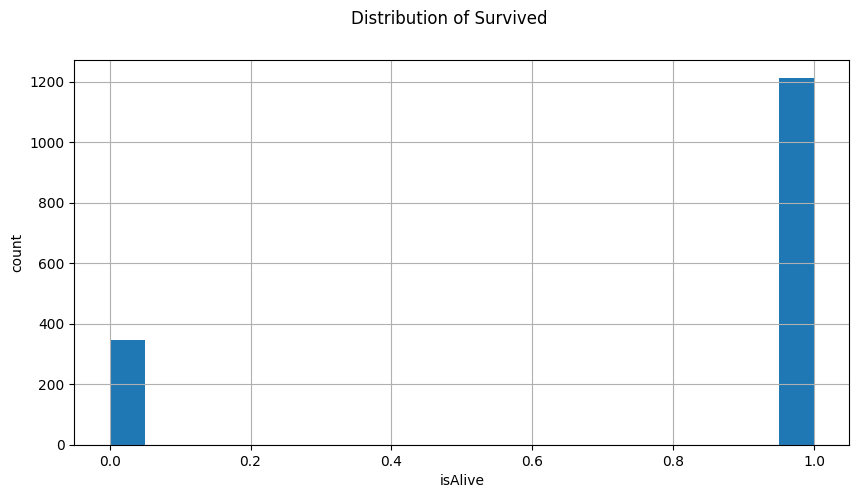

In [39]:
plt.figure(figsize = (10, 5))

train_data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Survived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

<Axes: xlabel='birth_age_305', ylabel='count'>

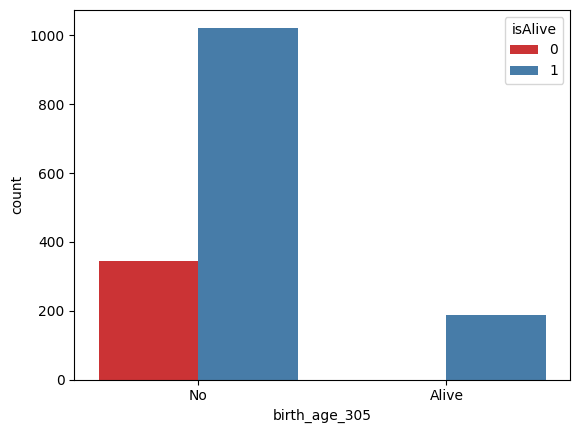

In [40]:
sns.countplot(data=train_data, x = 'birth_age_305', hue = 'isAlive', palette = 'Set1')

Чтобы посмотреть корелляцию таргета с, в том числе, категориальными признаками, применим LabelEncoder:

In [22]:
label_train_data = train_data

In [23]:
unprocessed_cat_features = label_train_data.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['culture', 'house', 'birth_age_305', 'Title']

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
for column in unprocessed_cat_features:
  label_train_data[column] = label_encoding.fit_transform(label_train_data[column])

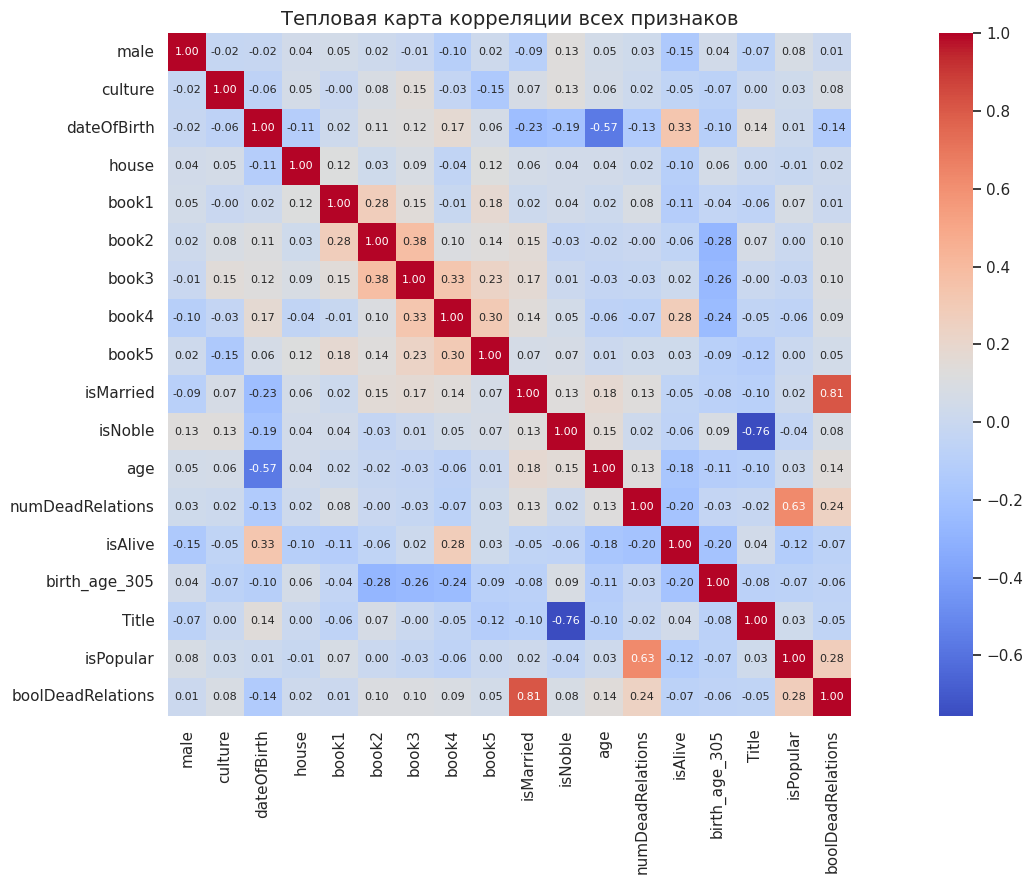

In [25]:
corrmat = label_train_data.corr()
plt.figure(figsize=(18, 9))
sns.set(font_scale=1)
hm = sns.heatmap(
    corrmat,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    cmap='coolwarm',
    yticklabels=corrmat.columns,
    xticklabels=corrmat.columns
)

plt.title('Тепловая карта корреляции всех признаков', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)   # Оставляем подписи оси Y горизонтальными
plt.tight_layout()       # Улучшаем компоновку
plt.show()

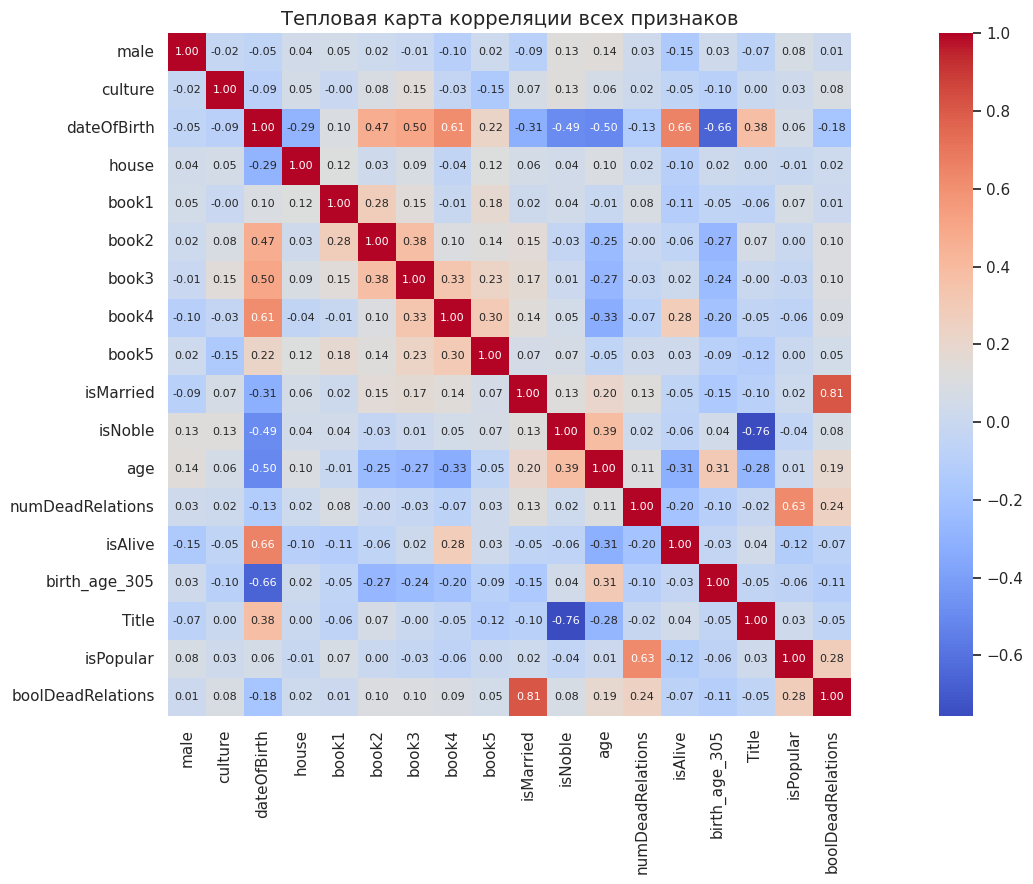

In [22]:
# include=[object]
corrmat = label_train_data1.corr()
plt.figure(figsize=(18, 9))
sns.set(font_scale=1)
hm = sns.heatmap(
    corrmat,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    cmap='coolwarm',
    yticklabels=corrmat.columns,
    xticklabels=corrmat.columns
)

plt.title('Тепловая карта корреляции всех признаков', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)   # Оставляем подписи оси Y горизонтальными
plt.tight_layout()       # Улучшаем компоновку
plt.show()

Высокая корелляция целевого признака с dateOfBirth (0.66), age (-0.31), book4.


Для избежания мультиколлинеарности и избыточности информации - удаляем сильнокореллирующие между собой признаки (оставляем только один фактор) и не связянные с таргетом: book2, book3, 'book5', 'isMarried', 'isNoble', 'Title'.

In [16]:
train_data.drop(columns=['book2', 'book3', 'book5', 'isMarried', 'isNoble', 'Title'], inplace = True)
# убираем признаки, тк низкая корреляция

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [17]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [44]:
X = train_data.drop(['isAlive'], axis=1)
y = train_data['isAlive']

In [19]:
# Создаем пайплайн для обработки данных
def process_data(data):
    data.house = data.house.fillna(data.house.mode()[0])

    data.age = data.age.fillna(0)
    data.dateOfBirth = data.dateOfBirth.fillna(0)
    data['birth_age_305'] = data.apply(
        lambda row: 'Alive' if row['dateOfBirth'] + row['age'] >= 305 else (
        'No' if not pd.isnull(row['dateOfBirth']) else 'Unknown'), axis=1)

    data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
    data['boolDeadRelations'] = (
        (data['isAliveMother'] == 1) |
        (data['isAliveFather'] == 1) |
        (data['isAliveHeir'] == 1) |
        (data['isAliveSpouse'] == 1)
        ).astype(int)

    data['culture'] = data['culture'].replace(['summer islands', 'summer islander',
                                              'summer isles'],'Summer Islands')
    data['culture'] = data['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'],
                                              'Ghiscari')
    data['culture'] = data['culture'].replace(["asshai'i", 'asshai'],'Asshai')
    data['culture'] = data['culture'].replace(['lysene', 'lyseni'],'Lysene')
    data['culture'] = data['culture'].replace(['Sealord', 'Lordsport'],'Andal')
    data['culture'] = data['culture'].replace(['braavosi', 'braavos'],'Braavosi')
    data['culture'] = data['culture'].replace(['dornishmen', 'dorne', 'dornish'],
                                              'Dornish')
    data['culture'] = data['culture'].replace(['myr', 'myrish', 'myrmen'],'Myrish')
    data['culture'] = data['culture'].replace(['westermen', 'westerman',
                                              'westerlands'],'Westermen')
    data['culture'] = data['culture'].replace(['westeros', 'westerosi'],'Westerosi')
    data['culture'] = data['culture'].replace(['stormlands', 'stormlander'],'Stormlander')
    data['culture'] = data['culture'].replace(['norvos', 'norvoshi'],'Norvoshi')
    data['culture'] = data['culture'].replace(['wildling', 'first men',
                                              'free folk'],'Free Folk')
    data['culture'] = data['culture'].replace(['the north', 'northmen'],'Northmen')
    data['culture'] = data['culture'].replace(['qartheen', 'qarth'],'Qartheen')
    data['culture'] = data['culture'].replace(['the reach', 'reach', 'reachmen'],'Reach')
    data.culture = data.culture.fillna('unknown')

    data = data.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
'popularity', 'title', 'name', 'book2', 'book3', 'book5', 'isMarried', 'isNoble', 'title'], axis=1)

    return data

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['culture', 'house', 'birth_age_305']),
        ('num', StandardScaler(), make_column_selector(dtype_include=['int64', 'float64']))
    ])
X_norm = preprocessor.fit_transform(X)

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [22]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,
                                                    y.values,
                                                    shuffle=True,
                                                    test_size=0.15,
                                                    random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [28]:
from sklearn.linear_model import LogisticRegression, LinearRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [24]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [26]:
from sklearn.metrics import accuracy_score

In [49]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, tol = 0.008)
# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)
# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [30]:
Ada_Boost = AdaBoostClassifier(n_estimators = 1000)
Ada_Boost.fit(X_train, y_train)
y_pred_a = Ada_Boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_a)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8120


In [31]:
Random_Forest = RandomForestClassifier(max_depth=18, n_estimators = 300, min_samples_split=4, min_samples_leaf=5)
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7607


In [ ]:
# X_train_dense = X_train.todense()   #или X_train.todense()
# X_test_dense = X_test.todense()     #или X_test.todense()

# # Создаем и обучаем модель
# Gaussian_NB = GaussianNB()
# Gaussian_NB.fit(X_train_dense, y_train)

# # Предсказание и оценка точности
# y_pred_nb = Gaussian_NB.predict(X_test_dense)
# accuracy = accuracy_score(y_test, y_pred_nb)
# print("Accuracy : %.4f" % accuracy)

In [44]:
Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train, y_train)
y_pred_nb = Gaussian_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.3248


In [34]:
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
y_pred_kn = KN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_kn)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7735


In [33]:
SV = SVC(kernel = 'poly')
SV.fit(X_train, y_train)
y_pred_sv = SV.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sv)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


In [36]:
Decision_Tree = DecisionTreeClassifier(max_depth=4, min_samples_split=3, min_samples_leaf=5)
Decision_Tree.fit(X_train, y_train)
y_pred_dt = Decision_Tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8162


In [34]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.0MB/s]


In [35]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [36]:
test_data_processed = process_data(test_data)
X_test = test_data_processed
X_norm_test = preprocessor.transform(test_data_processed)

In [38]:
y_pred_sub = SV.predict(X_norm_test)

In [39]:
submission.isAlive = y_pred_sub

In [40]:
submission.value_counts()

,count
isAlive,
1,300
0,89


In [41]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


In [42]:
submission.to_csv("/content/new_submission.csv", index=False)

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Наилучшая модель была получена с помощью метода С-опорных векторов (SVC) - точносьб 0,7969%

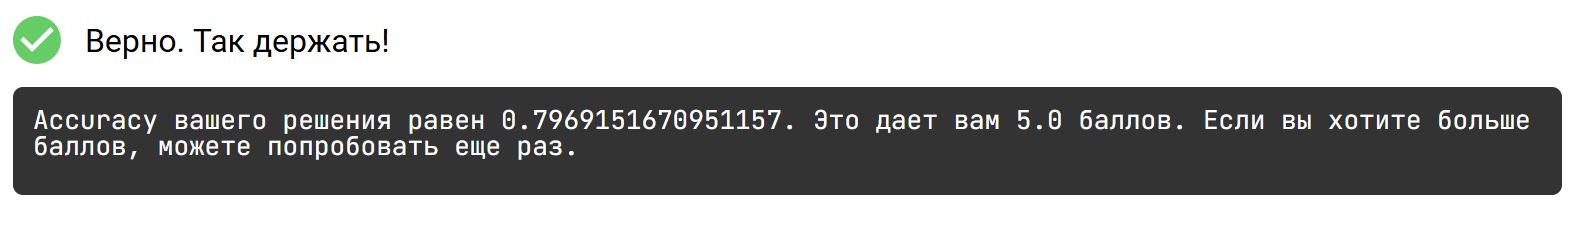